# Notebook C: Oil Infrastructure Map

This notebook plots the elements of oil and gas infrastructure that the extraction of the raw commodity relies upon. This is plotted because not only is the extractive itself toxic but associated infrastructure such as pipelines, refineries, and hazardous waste sites for petroleum by-products are toxic and hazardous too. Here, freight trains are included too as unlike many oil producing areas, Kern County exports much of its oil by train. What we see in the final map is unsurprisingly, a concentration of infrastructure in the western part of the county where oil production is most prominent.

I used multiple data sources for this map and note them as I read their files. 

In [3]:
import geopandas as gpd
import pandas as pd
import seaborn
import folium
import numpy as np
import contextily as cx
import matplotlib.pyplot as plt
import plotly.express as px

I read the California freight rail file retrieved from California Open Data Portal 

In [4]:
rail = gpd.read_file('rail.geojson')

<AxesSubplot: >

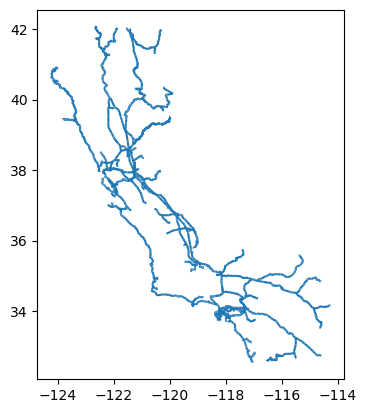

In [5]:
rail.plot()

In [6]:
rail.head(10)

,OBJECTID,BEGIN_MP,END_MP,ROW_OWNER,FREIGHT_OP,SUBDIVISIO,SHRTLN_NAM,SHRTLN_COD,PASS_OP,PASS_NETWO,...,TRK_CLSS,PASS_SPEED,FRT_SPEED,FRT_DNS,NUM_TRACK,STRACNET,CR63,SHAPE_LENG,SHAPE_Length,geometry
0,1,4.1,7.9,ACTA,"UP,BNSF",Alameda Corridor,,,,,...,4,0,40,6,3,C,"3MT,CTC",6187.935985,0.056088,"MULTILINESTRING ((-118.23308 33.96746, -118.23..."
1,2,15.5,16.1,ACTA,"UP,BNSF",Alameda Corridor,,,,,...,3,0,25,6,3,C,"3MT,CTC",706.057975,0.006488,"MULTILINESTRING ((-118.23542 33.80803, -118.23..."
2,3,14.8,15.5,ACTA,"UP,BNSF",Alameda Corridor,,,,,...,4,0,40,6,3,C,"3MT,CTC",1204.033226,0.011051,"MULTILINESTRING ((-118.23167 33.81843, -118.23..."
3,4,14.4,14.8,ACTA,"UP,BNSF",Alameda Corridor,,,,,...,4,0,40,6,3,C,"3MT,CTC",589.531070,0.005414,"MULTILINESTRING ((-118.22981 33.82351, -118.23..."
4,5,13.4,14.4,ACTA,"UP,BNSF",Alameda Corridor,,,,,...,4,0,40,6,3,C,"3MT,CTC",1033.658154,0.009554,"MULTILINESTRING ((-118.22655 33.83225, -118.22..."
5,6,12.8,13.4,ACTA,"UP,BNSF",Alameda Corridor,,,,,...,4,0,40,6,3,C,"3MT,CTC",737.078418,0.006766,"MULTILINESTRING ((-118.22425 33.83861, -118.22..."
6,7,12.1,12.8,ACTA,"UP,BNSF",Alameda Corridor,,,,,...,4,0,40,6,3,C,"3MT,CTC",1330.846531,0.012232,"MULTILINESTRING ((-118.21995 33.85006, -118.22..."
7,8,11.7,12.1,ACTA,"UP,BNSF",Alameda Corridor,,,,,...,4,0,40,6,3,C,"3MT,CTC",1003.126586,0.009139,"MULTILINESTRING ((-118.21772 33.85888, -118.21..."
8,9,10.6,11.7,ACTA,"UP,BNSF",Alameda Corridor,,,,,...,4,0,40,6,3,C,"3MT,CTC",1672.353055,0.015187,"MULTILINESTRING ((-118.21662 33.87371, -118.21..."
9,10,7.9,10.6,ACTA,"UP,BNSF",Alameda Corridor,,,,,...,4,0,40,6,3,C,"3MT,CTC",4323.825797,0.039133,"MULTILINESTRING ((-118.22277 33.91235, -118.22..."


pd.set_option('display.max_columns', None)
rail.sample(20)

In [7]:
rail.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['OBJECTID', 'BEGIN_MP', 'END_MP', 'ROW_OWNER', 'FREIGHT_OP',
       'SUBDIVISIO', 'SHRTLN_NAM', 'SHRTLN_COD', 'PASS_OP', 'PASS_NETWO',
       'COMM_OP', 'COMM_NETWO', 'RECR_OP', 'RECR_NETWO', 'STATUS', 'RR_CLSS',
       'TRK_CLSS', 'PASS_SPEED', 'FRT_SPEED', 'FRT_DNS', 'NUM_TRACK',
       'STRACNET', 'CR63', 'SHAPE_LENG', 'SHAPE_Length', 'geometry'],
      dtype='object')>

I then subset the rail data to just include relevant columns. The above sample of data shows both a freight and passenger operator because Amtrak uses freight-owned railtracks. 

In [8]:

railsub = rail[['FREIGHT_OP',
       'SUBDIVISIO', 'SHAPE_LENG', 'SHAPE_Length', 'geometry', 'STATUS']]

In [9]:
railsub.head()

,FREIGHT_OP,SUBDIVISIO,SHAPE_LENG,SHAPE_Length,geometry,STATUS
0,"UP,BNSF",Alameda Corridor,6187.935985,0.056088,"MULTILINESTRING ((-118.23308 33.96746, -118.23...",1
1,"UP,BNSF",Alameda Corridor,706.057975,0.006488,"MULTILINESTRING ((-118.23542 33.80803, -118.23...",1
2,"UP,BNSF",Alameda Corridor,1204.033226,0.011051,"MULTILINESTRING ((-118.23167 33.81843, -118.23...",1
3,"UP,BNSF",Alameda Corridor,589.531070,0.005414,"MULTILINESTRING ((-118.22981 33.82351, -118.23...",1
4,"UP,BNSF",Alameda Corridor,1033.658154,0.009554,"MULTILINESTRING ((-118.22655 33.83225, -118.22...",1


In [10]:
railsub.to_crs(3857)

,FREIGHT_OP,SUBDIVISIO,SHAPE_LENG,SHAPE_Length,geometry,STATUS
0,"UP,BNSF",Alameda Corridor,6187.935985,0.056088,"MULTILINESTRING ((-13161646.100 4024432.980, -...",1
1,"UP,BNSF",Alameda Corridor,706.057975,0.006488,"MULTILINESTRING ((-13161906.739 4003054.432, -...",1
2,"UP,BNSF",Alameda Corridor,1204.033226,0.011051,"MULTILINESTRING ((-13161489.389 4004447.290, -...",1
3,"UP,BNSF",Alameda Corridor,589.531070,0.005414,"MULTILINESTRING ((-13161281.722 4005128.318, -...",1
4,"UP,BNSF",Alameda Corridor,1033.658154,0.009554,"MULTILINESTRING ((-13160919.366 4006299.167, -...",1
...,...,...,...,...,...,...
2431,,Main Line,48.202513,0.000439,"MULTILINESTRING ((-13049947.170 3999262.016, -...",1
2432,,Main Line,5922.217821,0.054596,"MULTILINESTRING ((-13677839.968 4665733.830, -...",2
2433,"UP,BNSF",Niles,283.015880,0.002718,"MULTILINESTRING ((-13577768.536 4518849.636, -...",1
2434,"BNSF,UP",Orange,522.242887,0.004710,"MULTILINESTRING ((-13119830.207 4001335.429, -...",1


<AxesSubplot: >

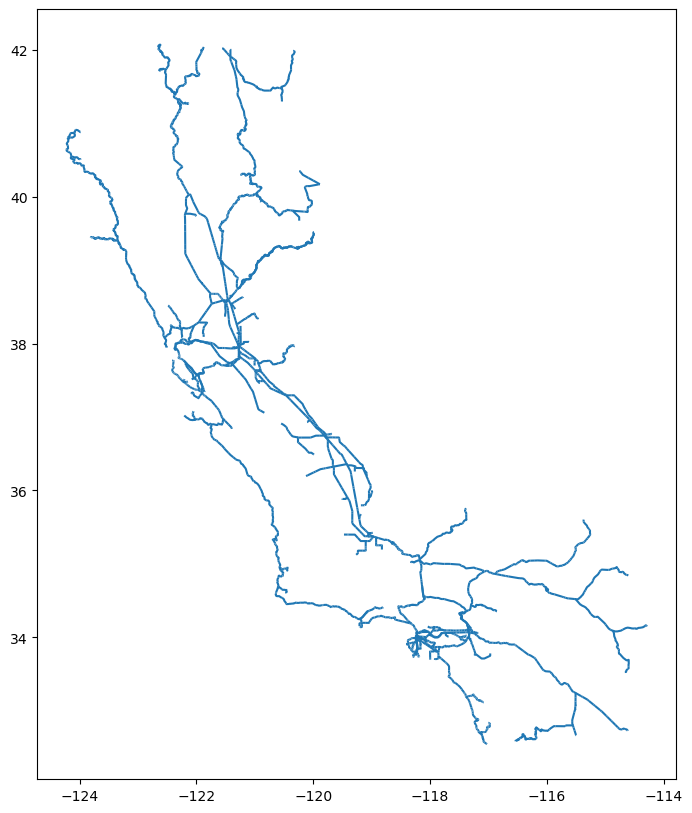

In [11]:
railsub.plot(figsize=(10,10))

Here I read the CalEnviroscreen data to accesss Kern County census tracts and pollution burden scores. 

In [13]:
gdf = gpd.read_file('CES4 Final Shapefile.shp',
                   dtype= {
        'Tract':str,
    }, crs = "EPSG:4326")

In [14]:
gdf_kern = gdf.loc[gdf['County'] == 'Kern'] #subsets data to just include Kern County
gdf_kern.sample()


,Tract,ZIP,County,ApproxLoc,TotPop19,CIscore,CIscoreP,Ozone,OzoneP,PM2_5,...,Elderly65,Hispanic,White,AfricanAm,NativeAm,OtherMult,Shape_Leng,Shape_Area,AAPI,geometry
1539,6.029006e+09,93241,Kern,Lamont,7230,51.105092,89.019163,0.067183,97.000622,13.837345,...,4.8548,96.6252,2.3098,0.0,0.0,0.1107,13689.037121,7.734064e+06,0.9544,"POLYGON ((99926.405 -304887.925, 99888.104 -30..."


I project the CalEnviroscreen data to ensure it matches with the rail data.

In [15]:
gdf_kern = gdf_kern.to_crs("EPSG:4326")

In [16]:
#subsetting data further by column 
#'Tract','TotPop19', 'PesticideP','Tox_Rel_P', 'DrinkWat', 
                #'DrinkWatP', 'Lead_P', 'CleanupP', 'GWThreatP', 
                #    'HazWasteP', 'ImpWatBod', 'ImpWatBodP', 'SolWasteP', 
                 #     'PolBurdSc', 'PolBurdP', 'Asthma', 
                  #   'AsthmaP', 'LowBirWP','CardiovasP',
       #  'Poverty','Hispanic', 'White', 'AfricanAm',
        #             'NativeAm', 'OtherMult',
gdf_ksub = gdf_kern[['PolBurdSc', 'Tract', 'Shape_Leng', 'Shape_Area', 'geometry']]
gdf_ksub.sample(1)

,PolBurdSc,Tract,Shape_Leng,Shape_Area,geometry
1494,4.410527,6.029006e+09,85801.655848,2.716953e+08,"POLYGON ((-118.69604 35.26828, -118.69383 35.2..."


I plot the data to ensure its coordinates are working and then clip the rail data to the Kern County boundaries.  

<AxesSubplot: >

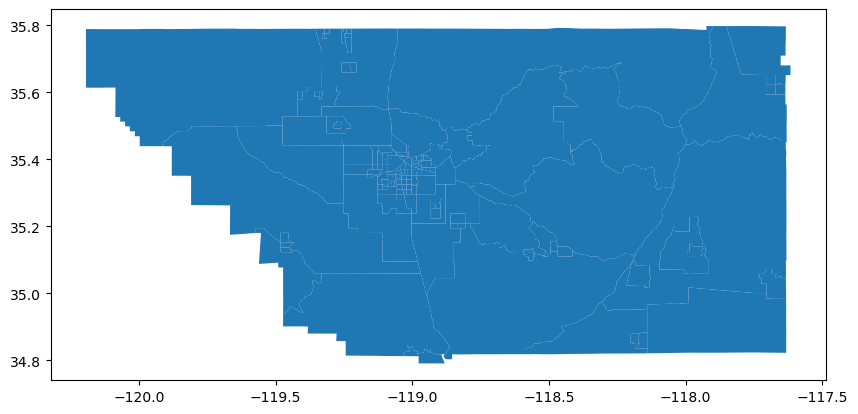

In [17]:
gdf_ksub.plot(figsize = (10,10))

/opt/conda/lib/python3.10/site-packages/geopandas/tools/clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


<AxesSubplot: >

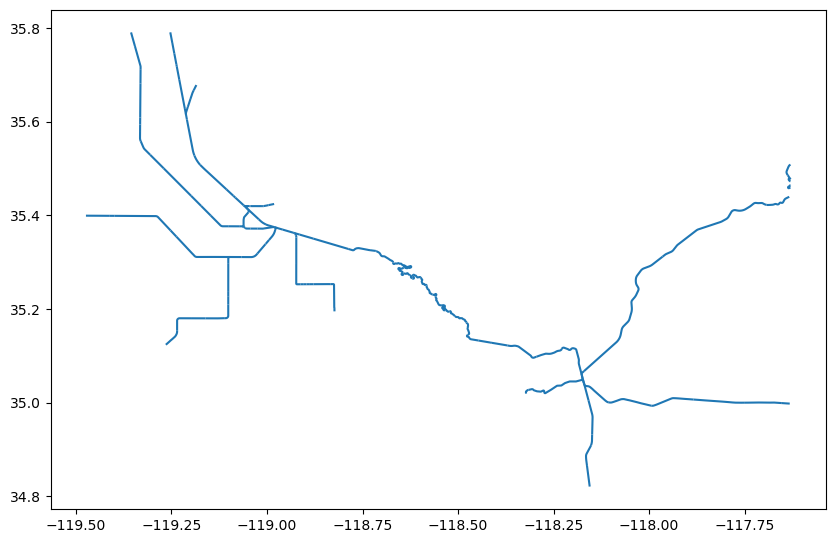

In [18]:
rail_clip = gpd.clip(railsub, gdf_ksub)
rail_clip.plot(figsize=(10,10))

In [19]:
rail_clip = rail_clip.to_crs("EPSG:4326") 

In [20]:
rail_clip['new_column'] = 'Freight' # You'll get a column of all Freight


I read the petroleum product pipeline data, the natural gas pipeline data, and crude oil pipeline data, all of which I retrieved from the US Energy Information Administration. 

In [23]:
petroleumpipe = gpd.read_file('Petroleum_Product_Pipelines.geojson')
petroleumpipe.sample(5)

,FID,Opername,Pipename,Shape_Leng,SHAPE_Length,geometry
131,132,MIDSTREAM PARTNERS,Magellan,0.405249,0.405249,"MULTILINESTRING ((-102.39218 31.42346, -102.33..."
216,217,DUKE ENERGY,Bartow Anclote Hot Oil Pipeline,0.472112,0.472112,"MULTILINESTRING ((-82.59333 27.86156, -82.6879..."
258,259,BP PIPELINES (NORTH AMERICA),Whiting - Roseville,7.507853,7.507853,"MULTILINESTRING ((-93.19820 45.02142, -92.9572..."
58,59,KINDER MORGAN,Plantation,1.190056,1.190056,"MULTILINESTRING ((-79.82608 36.14191, -79.8238..."
183,184,KINDER MORGAN,CALNEV,0.660849,0.660849,"MULTILINESTRING ((-117.91317 34.84489, -117.85..."


In [25]:
gaspipe = gpd.read_file('Natural_Gas_Interstate_and_Intrastate_Pipelines.geojson')
gaspipe.sample(5)

,FID,TYPEPIPE,Operator,Status,Shape_Leng,SHAPE_Length,geometry
7739,7740,Interstate,Iroquois Gas Trans Co,Operating,0.008759,0.008759,"MULTILINESTRING ((-75.25619 43.44989, -75.2492..."
15914,15915,Intrastate,Northwestern Energy Co,Operating,0.002997,0.002997,"MULTILINESTRING ((-112.23034 48.88229, -112.23..."
1875,1876,Interstate,El Paso Natural Gas Co,Operating,0.414673,0.414673,"MULTILINESTRING ((-101.28166 35.57984, -101.30..."
20798,20799,Interstate,Enable Gas Transmission,Operating,0.001049,0.001049,"MULTILINESTRING ((-93.77161 32.50793, -93.7715..."
4227,4228,Intrastate,ONEOK Gas Transmission LLC,Operating,0.048449,0.048449,"MULTILINESTRING ((-99.56211 35.54636, -99.5621..."


In [29]:
crudepipe = gpd.read_file('Crude_Oil_Pipelines.geojson')
crudepipe.sample(5)

,FID,Opername,Pipename,Shape_Leng,SHAPE_Length,geometry
84,85,MARATHON,"Patoka, IL - Martinsville, OH",9.142543,9.142543,"MULTILINESTRING ((-90.09452 38.82871, -89.0711..."
8,9,ENBRIDGE,Mainline,16.656252,16.656252,"MULTILINESTRING ((-97.53267 49.00058, -104.616..."
187,188,ENERGY TRANSFER,Dakota Access Pipeline (DAPL),0.036971,0.036971,"MULTILINESTRING ((-103.35078 48.27078, -103.34..."
13,14,ENBRIDGE,North Dakota System,1.048866,1.048866,"MULTILINESTRING ((-101.26126 48.23930, -101.25..."
152,153,HUNT CRUDE OIL SUPPLY,Hunt Oil,0.948319,0.948319,"MULTILINESTRING ((-89.33457 31.78837, -89.1905..."


Now I clip the pipeline data to the Kern County boundaries.

In [30]:
petroclip = gpd.clip(petroleumpipe,gdf_ksub)

/opt/conda/lib/python3.10/site-packages/geopandas/tools/clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


In [31]:
petroclip.shape

(2, 6)

In [32]:
petroclip['new_column'] = 'Petroleum Products Pipeline' # You'll get a column of all 5s
petroclip.sample()

,FID,Opername,Pipename,Shape_Leng,SHAPE_Length,geometry,new_column
179,180,KINDER MORGAN,SFPP_NORTH,3.888583,3.888583,"MULTILINESTRING ((-119.25179 35.79044, -119.23...",Petroleum Products Pipeline


In [33]:
gasclip = gpd.clip(gaspipe,gdf_ksub)


/opt/conda/lib/python3.10/site-packages/geopandas/tools/clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


In [34]:
gasclip['new_column'] = 'Natural Gas Pipeline' # You'll get a column of all 5s
gasclip.sample()

,FID,TYPEPIPE,Operator,Status,Shape_Leng,SHAPE_Length,geometry,new_column
23546,23547,Intrastate,California Gas Transmission Co,Operating,0.218274,0.218274,"LINESTRING (-118.60339 35.06854, -118.77568 35...",Natural Gas Pipeline


In [35]:
crudeclip = gpd.clip(crudepipe,gdf_ksub)

/opt/conda/lib/python3.10/site-packages/geopandas/tools/clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


In [36]:
crudeclip['new_column'] = 'Crude Oil Pipeline' # You'll get a column of all 5s
crudeclip.head(10)

,FID,Opername,Pipename,Shape_Leng,SHAPE_Length,geometry,new_column
133,134,PLAINS ALL AMERICAN PIPELINE,West Coast Systmem,3.620786,3.620786,"MULTILINESTRING ((-118.83238 34.81750, -119.00...",Crude Oil Pipeline
118,119,EXXONMOBIL WEST COAST,San Joaquin Valley,2.507605,2.507605,"MULTILINESTRING ((-119.76721 35.67625, -119.70...",Crude Oil Pipeline
73,74,PHILLIPS 66 PIPELINE,Santa Maria Refinery - Junction,1.669210,1.669210,"LINESTRING (-120.19385 35.73484, -119.97449 35...",Crude Oil Pipeline
76,77,PHILLIPS 66 PIPELINE,Tosco 12 & 8,0.288304,0.288304,"LINESTRING (-119.38100 35.23372, -119.46665 35...",Crude Oil Pipeline
75,76,PHILLIPS 66 PIPELINE,Sunset - Junction,0.830120,0.830120,"MULTILINESTRING ((-119.39125 35.09812, -119.44...",Crude Oil Pipeline
72,73,PHILLIPS 66 PIPELINE,Junction to Rodeo Refinery,3.428383,3.428383,"LINESTRING (-120.03517 35.78881, -119.97449 35...",Crude Oil Pipeline


In [37]:
crudeclip.dtypes

FID                int64
Opername          object
Pipename          object
Shape_Leng       float64
SHAPE_Length     float64
geometry        geometry
new_column        object
dtype: object

Now I read Toxic Release Inventory data retrieved from the EPA. Notably, in California the Clean Harbors, LLC hazardous waste facility for petroleum products located in Buttonwillow next to the largest oil production site is the most polluting source in the state.

In [39]:
tri = pd.read_csv('TRI_2021_us_combined.csv')
tri.head()

,4. FACILITY NAME,5. STREET ADDRESS,6. CITY,7. COUNTY,12. LATITUDE,13. LONGITUDE,20. INDUSTRY SECTOR,47. UNIT OF MEASURE,104. TOTAL RELEASES
0,TRICOR REFINING LLC,1134 MANOR ST,BAKERSFIELD,KERN,35.418500,-119.011200,Petroleum,Pounds,0.169751
1,PRC-DESOTO INTERNATIONAL INC.,11601 UNITED ST,MOJAVE,KERN,34.988500,-118.150040,Chemicals,Pounds,26598.008400
2,ASPHALT TERMINALS LLC - BAKERSFIELD,1201 CHINA GRADE LOOP,BAKERSFIELD,KERN,35.426807,-119.006374,Petroleum Bulk Terminals,Pounds,12.700000
3,TRICAL MOJAVE,1667 PURDY AVE,MOJAVE,KERN,35.028056,-118.160833,Chemicals,Pounds,1553.000000
4,KEMIRA WATER SOLUTIONS INC,18700 HWY 14 N,MOJAVE,KERN,35.085270,-118.142500,Chemicals,Pounds,12.172631


I keep many of the variables to later include as a tool tip.

In [40]:
tri = tri[['4. FACILITY NAME', '5. STREET ADDRESS', '6. CITY', '20. INDUSTRY SECTOR','12. LATITUDE',
           '13. LONGITUDE', '104. TOTAL RELEASES']]
tri.sample(10)

,4. FACILITY NAME,5. STREET ADDRESS,6. CITY,20. INDUSTRY SECTOR,12. LATITUDE,13. LONGITUDE,104. TOTAL RELEASES
16,CHAMPIONX-BAKERSFIELD,6321 DISTRICT BLVD,BAKERSFIELD,Chemical Wholesalers,35.313120,-119.073860,4.575000e+02
6,ENNIS-FLINT BAKERSFIELD,200 2ND ST,BAKERSFIELD,Chemicals,35.356910,-119.003580,3.331000e+03
8,CLEAN HARBORS BUTTONWILLOW LLC,2500 WEST LOKERN ROAD,BUTTONWILLOW,Hazardous Waste,35.401811,-119.612789,2.220640e+06
15,AMBER CHEMICAL INC.,5201 BOYLAN ST,BAKERSFIELD,Chemical Wholesalers,35.401250,-119.052070,3.360000e+03
2,ASPHALT TERMINALS LLC - BAKERSFIELD,1201 CHINA GRADE LOOP,BAKERSFIELD,Petroleum Bulk Terminals,35.426807,-119.006374,1.270000e+01
9,CONTAINMENT SOLUTIONS INC,2600 PEGASUS DR,BAKERSFIELD,Plastics and Rubber,35.429810,-119.064320,3.859600e+04
18,KERN OIL & REFINING CO,7724 EAST PANAMA LANE,BAKERSFIELD,Petroleum,35.295278,-118.921111,7.638485e+03
13,BAKERSFIELD RENEWABLE FUELS LLC - AREA 3,3663 GIBSON ST,BAKERSFIELD,Petroleum,35.393611,-119.052500,2.396630e+01
12,SAN JOAQUIN REFINING CO INC,3500 SHELL ST,BAKERSFIELD,Petroleum,35.395110,-119.046520,7.548339e+03
3,TRICAL MOJAVE,1667 PURDY AVE,MOJAVE,Chemicals,35.028056,-118.160833,1.553000e+03


In [41]:
tri.rename(columns={"12. LATITUDE": "Latitude", "13. LONGITUDE": "Longitude", "20. INDUSTRY SECTOR": "Industry",
                    '104. TOTAL RELEASES':
                   'total_releases'}, inplace=True)
tri.sample(5)

,4. FACILITY NAME,5. STREET ADDRESS,6. CITY,Industry,Latitude,Longitude,total_releases
0,TRICOR REFINING LLC,1134 MANOR ST,BAKERSFIELD,Petroleum,35.418500,-119.011200,0.169751
4,KEMIRA WATER SOLUTIONS INC,18700 HWY 14 N,MOJAVE,Chemicals,35.085270,-118.142500,12.172631
18,KERN OIL & REFINING CO,7724 EAST PANAMA LANE,BAKERSFIELD,Petroleum,35.295278,-118.921111,7638.484900
10,SUEZ WATER TECHNOLOGIES & SOLUTIONS INC. - BAK...,3050 PEGASUS RD,BAKERSFIELD,Chemicals,35.432910,-119.064740,1105.000000
12,SAN JOAQUIN REFINING CO INC,3500 SHELL ST,BAKERSFIELD,Petroleum,35.395110,-119.046520,7548.338900


Here, I exclude many values in the Industry column that likely do not involve the oil and gas industry. Many of those I decided to include such as hazardous waste and chemicals are not self evident as being tied to oil production. However, searching many of these companies revealed that they either disposed of or used petroleum by-products at their facility.

In [42]:
tri = tri[tri.Industry != 'Nonmetallic Mineral Product']

In [43]:
tri = tri[tri.Industry != 'Food']

In [44]:
tri = tri[tri.Industry != 'Other']

In [45]:
tri = tri[tri.Industry != 'Plastics and Rubber']

In [46]:
tri = tri[tri.Industry != 'Wood Products']

In [47]:
tri = tri[tri.Industry != 'Metal Mining']

In [48]:
tri = tri[tri.Industry != 'Fabricated Metals']
tri.sample(10)

,4. FACILITY NAME,5. STREET ADDRESS,6. CITY,Industry,Latitude,Longitude,total_releases
14,BAKER PETROLITE,5135 BOYLAN ST,BAKERSFIELD,Chemical Wholesalers,35.400631,-119.052076,3733.835300
1,PRC-DESOTO INTERNATIONAL INC.,11601 UNITED ST,MOJAVE,Chemicals,34.988500,-118.150040,26598.008400
10,SUEZ WATER TECHNOLOGIES & SOLUTIONS INC. - BAK...,3050 PEGASUS RD,BAKERSFIELD,Chemicals,35.432910,-119.064740,1105.000000
5,TAFT MANUFACTURING LLC,19815 SOUTH LAKE ROAD,TAFT,Chemicals,35.144400,-119.237778,15.430000
4,KEMIRA WATER SOLUTIONS INC,18700 HWY 14 N,MOJAVE,Chemicals,35.085270,-118.142500,12.172631
7,NUSIL TECHNOLOGY LLC,2343 PEGASUS DR,BAKERSFIELD,Chemicals,35.427180,-119.064310,3031.000000
12,SAN JOAQUIN REFINING CO INC,3500 SHELL ST,BAKERSFIELD,Petroleum,35.395110,-119.046520,7548.338900
16,CHAMPIONX-BAKERSFIELD,6321 DISTRICT BLVD,BAKERSFIELD,Chemical Wholesalers,35.313120,-119.073860,457.500000
17,BAKERSFIELD RENEWABLE FUELS LLC - AREAS 1 & 2,6451 ROSEDALE HWY,BAKERSFIELD,Petroleum,35.382500,-119.070556,8676.954000
15,AMBER CHEMICAL INC.,5201 BOYLAN ST,BAKERSFIELD,Chemical Wholesalers,35.401250,-119.052070,3360.000000


As with the other data, I convert the TRI data to a geodataframe and project to the same coordinates. 

In [49]:
# change column names to convert to gdf
tri_gdf = gpd.GeoDataFrame(
    tri, geometry = gpd.points_from_xy(tri.Longitude,tri.Latitude),crs = "EPSG:4326")
tri_gdf.head()

,4. FACILITY NAME,5. STREET ADDRESS,6. CITY,Industry,Latitude,Longitude,total_releases,geometry
0,TRICOR REFINING LLC,1134 MANOR ST,BAKERSFIELD,Petroleum,35.418500,-119.011200,0.169751,POINT (-119.01120 35.41850)
1,PRC-DESOTO INTERNATIONAL INC.,11601 UNITED ST,MOJAVE,Chemicals,34.988500,-118.150040,26598.008400,POINT (-118.15004 34.98850)
2,ASPHALT TERMINALS LLC - BAKERSFIELD,1201 CHINA GRADE LOOP,BAKERSFIELD,Petroleum Bulk Terminals,35.426807,-119.006374,12.700000,POINT (-119.00637 35.42681)
3,TRICAL MOJAVE,1667 PURDY AVE,MOJAVE,Chemicals,35.028056,-118.160833,1553.000000,POINT (-118.16083 35.02806)
4,KEMIRA WATER SOLUTIONS INC,18700 HWY 14 N,MOJAVE,Chemicals,35.085270,-118.142500,12.172631,POINT (-118.14250 35.08527)


I convert total releases to an integer to get rid of decimal points which look messy when shown as a tool tip. Here, it is notable that many facilities share the same address but are classified under different industries and have different total releases. To simplify the data, I used excel to combine facilities with the same addresses before loading the data.


In [50]:
tri_gdf['total_releases'] = tri_gdf['total_releases'].apply(np.int64)
tri_gdf.sample(10)

,4. FACILITY NAME,5. STREET ADDRESS,6. CITY,Industry,Latitude,Longitude,total_releases,geometry
3,TRICAL MOJAVE,1667 PURDY AVE,MOJAVE,Chemicals,35.028056,-118.160833,1553,POINT (-118.16083 35.02806)
8,CLEAN HARBORS BUTTONWILLOW LLC,2500 WEST LOKERN ROAD,BUTTONWILLOW,Hazardous Waste,35.401811,-119.612789,2220639,POINT (-119.61279 35.40181)
10,SUEZ WATER TECHNOLOGIES & SOLUTIONS INC. - BAK...,3050 PEGASUS RD,BAKERSFIELD,Chemicals,35.432910,-119.064740,1105,POINT (-119.06474 35.43291)
11,ARGO CHEMICAL INC,30933 IMPERIAL ST,BAKERSFIELD,Chemical Wholesalers,35.456130,-119.257260,229,POINT (-119.25726 35.45613)
12,SAN JOAQUIN REFINING CO INC,3500 SHELL ST,BAKERSFIELD,Petroleum,35.395110,-119.046520,7548,POINT (-119.04652 35.39511)
0,TRICOR REFINING LLC,1134 MANOR ST,BAKERSFIELD,Petroleum,35.418500,-119.011200,0,POINT (-119.01120 35.41850)
16,CHAMPIONX-BAKERSFIELD,6321 DISTRICT BLVD,BAKERSFIELD,Chemical Wholesalers,35.313120,-119.073860,457,POINT (-119.07386 35.31312)
18,KERN OIL & REFINING CO,7724 EAST PANAMA LANE,BAKERSFIELD,Petroleum,35.295278,-118.921111,7638,POINT (-118.92111 35.29528)
17,BAKERSFIELD RENEWABLE FUELS LLC - AREAS 1 & 2,6451 ROSEDALE HWY,BAKERSFIELD,Petroleum,35.382500,-119.070556,8676,POINT (-119.07056 35.38250)
15,AMBER CHEMICAL INC.,5201 BOYLAN ST,BAKERSFIELD,Chemical Wholesalers,35.401250,-119.052070,3360,POINT (-119.05207 35.40125)


In [51]:
tri_gdf.shape

(18, 8)

In [52]:
tri_gdf1 = tri_gdf

In [53]:
tri_gdf1['total_releases'] = tri_gdf['total_releases'].apply(str)


Here the map shows that oil and gas infrastructure is concentrated in the west of the county where oil and gas extraction occurs. The toxic release sites are typically along either pipelines or freight lines. A look at the data shows that the Clean Harbors, Inc hazardous waste site near the crude oil pipelines is also near the most prominent area of oil drilling, and is by far, the worst emitter of toxins in the area and in the state. Total releases are measured in pounds. This facility which has come under scrutiny and been the site of environmental justice struggles largely services the nearby oil fields. 

In [69]:
Kern7 = folium.Map(location=[35.4,-118.8], 
               zoom_start = 8,
               tiles='CartoDB positron', 
               attribution='CartoDB')
  
style1 = {'fillColor': '#000000', 'color': '#000000', 'weight': 1.5}
style2 = {'fillColor': '#7491FF', 'color': '#7491FF',  "weight": 1.5}
style3 = {'fillColor': '#B01043', 'color': '#B01043',  "weight": 1.5}
style4 = {'fillColor': '#DE76F5', 'color': '#DE76F5',  "weight": 1.5}


folium.Choropleth(
    geo_data=gdf_ksub,
    name="Census Tracts",
    data=gdf_ksub,
    columns=["Tract", "PolBurdSc"],
    key_on="feature.properties.Tract", #this gets into geojson structure of data ie feature.properties.column name
    #for each tract map the pollution score
    fill_color="YlGn",
    fill_opacity=0.5,
    line_opacity=0.2,
    legend_name="Pollution Burden Score",
).add_to(Kern7)
f1 = folium.FeatureGroup(name="Crude Oil Pipeline").add_to(Kern7)
folium.GeoJson(crudeclip, name="Crude Oil Pipeline", style_function=lambda x:style1).add_to(f1)

f2 = folium.FeatureGroup(name="Freight Lines").add_to(Kern7)
folium.GeoJson(rail_clip, name="Freight Lines", style_function=lambda x:style2).add_to(f2)

f3 = folium.FeatureGroup(name="Natural Gas Pipeline").add_to(Kern7)
folium.GeoJson(gasclip, name="Natural Gas Pipelines",style_function=lambda x:style3).add_to(f3)

f4 = folium.FeatureGroup(name="Other Petroleum Pipeline").add_to(Kern7)
folium.GeoJson(petroclip, name="Other Petroleum Pipelines", style_function=lambda x:style4).add_to(f4)

folium.GeoJson(
    data=tri_gdf, 
    name="Toxic Release Facilities", 
    marker=folium.CircleMarker(radius=6, color="orange", fill_color="orange", fill_opacity=.5, weight=1), #color="black",fill_opacity=1, fill=True,
    tooltip=folium.features.GeoJsonTooltip(
                        fields=[
                                'Industry', '4. FACILITY NAME', 'total_releases',
                               ],
                        aliases=[
                                 "Industry:", 'Facility name', 'total releases of chemicals (in pounds)', 
                                ], 
                        localize=True,
                        sticky=False,
                        labels=True,
                        style="""
                            background-color: #F0EFEF;
                            border: 2px solid black;
                            border-radius: 3px;
                            box-shadow: 3px;
                        """,
                        max_width=800,),
                            highlight_function=lambda x: {'weight':3,'fillColor':'grey'},
 ).add_to(Kern7) 
folium.LayerControl().add_to(Kern7)


Kern7